# Retail Lab (Simple Regression Model)

**Learning Objectives:**
  * Define and fit simple regression models
  * Gain exposure to retail related DataSets

## Context of the datasets

### 1. There are three datasets: `articles.csv.zip`, `customers.csv.zip` and `transactions2020.csv.zip`

#### 2. The Articles dataset contains information over products available.
#### 3. The Customers dataset contains information over registered customers.
#### 4. The Transactions dataset contains purchases of articles made by customers.



## 1. Library Import

In [33]:
import pandas as pd
import warnings
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
from matplotlib import pyplot as plt

In [3]:
warnings.simplefilter('ignore')

## 2. Data loading and DataFrame creation

In [4]:
Articles=pd.read_csv("https://github.com/thousandoaks/Python4DS-I/raw/main/datasets/articles.csv.zip")

In [5]:
Articles.head(3)

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.


In [6]:
Articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

In [7]:
Customers=pd.read_csv("https://github.com/thousandoaks/Python4DS-I/raw/main/datasets/customers.csv.zip")

In [8]:
Customers.sample(3)

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
1094776,cc4b33b3485487734e48c2c5cae50ed58accd227a300d1...,NaN,NaN,ACTIVE,NONE,25.0,8eabf43cbc72adaf8cd161032a3fd9862de9e384cbda0c...
1361914,fe1afc0891a3b0434ecb129451cfca056c2f74a270b397...,NaN,NaN,ACTIVE,NONE,56.0,8bc9c2026c4def37967f4b7beda97aca7e27f7894abeaa...
1079177,c961884a1dab0ef7c21dc59df398403b9889ae5cf84d7b...,NaN,NaN,PRE-CREATE,NONE,48.0,076c621646afe296de8d7887996d0fbc71f90f0ed3ee14...


In [9]:
Customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355969 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB


In [10]:
Transactions=pd.read_csv("https://github.com/thousandoaks/Python4DS-I/raw/main/datasets/transactions2020.csv.zip")

In [11]:
Transactions.sample(3)

,t_dat,customer_id,article_id,price,sales_channel_id
2408536,2020-07-15,639f2b6ff19a00a74fb716a22b294578e17f7ecb4a567d...,792023001,0.016932,1
1180058,2020-06-23,2235be63fa47aba61e245e556b21d97f184c36baac2848...,899002003,0.025407,2
248849,2020-06-06,4208ed37cb4748fba95e4bb315cebd1d2ae4ea16d4b287...,817047001,0.015831,1


In [12]:
Transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5151470 entries, 0 to 5151469
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   t_dat             object 
 1   customer_id       object 
 2   article_id        int64  
 3   price             float64
 4   sales_channel_id  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 196.5+ MB


## 3. Merging DataFrames

#### 3.1. Transactions-Articles


In [13]:
Transactions.head(3)

,t_dat,customer_id,article_id,price,sales_channel_id
0,2020-06-01,00075ef36696a7b4ed8c83e22a4bf7ea7c90ee110991ec...,844198001,0.016932,2
1,2020-06-01,000b31552d3785c79833262bbeefa484cbc43d7b612b3c...,777016001,0.030492,1
2,2020-06-01,002d8d26c9414c981c012c6f5e4b2de7ffd3bc568c4574...,820507001,0.010153,2


In [14]:
Articles.head(3)

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.


In [15]:
## we merge both DataFrames using the common key: article_id. We store the result in a new DataFrame
TransactionsAndArticles=pd.merge(Transactions, Articles, how='left',on='article_id')

#### 3.2. Transactions-Articles-Customers

In [16]:
TransactionsAndArticles.head(3)

,t_dat,customer_id,article_id,price,sales_channel_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,2020-06-01,00075ef36696a7b4ed8c83e22a4bf7ea7c90ee110991ec...,844198001,0.016932,2,844198,Saturn trs (J),296,Pyjama bottom,Nightwear,...,Nightwear,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1017,"Under-, Nightwear",Pyjama bottoms in sweatshirt fabric with wide ...
1,2020-06-01,000b31552d3785c79833262bbeefa484cbc43d7b612b3c...,777016001,0.030492,1,777016,Cisco skirt,275,Skirt,Garment Lower body,...,Trousers & Skirt,A,Ladieswear,1,Ladieswear,18,Womens Trend,1009,Trousers,"Calf-length skirt in softly draping, patterned..."
2,2020-06-01,002d8d26c9414c981c012c6f5e4b2de7ffd3bc568c4574...,820507001,0.010153,2,820507,Charlotte Hipster Primula,286,Underwear bottom,Underwear,...,Expressive Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Hipster briefs in lace with a mid waist, lined..."


In [17]:
Customers.head(3)

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...


In [18]:
## we merge both DataFrames using the common key: customer_id. We store the result in a new DataFrame
TransactionsAndArticlesAndCustomers=pd.merge(TransactionsAndArticles, Customers, how='left',on='customer_id')

In [19]:
TransactionsAndArticlesAndCustomers.head(3)

,t_dat,customer_id,article_id,price,sales_channel_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,...,section_name,garment_group_no,garment_group_name,detail_desc,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,2020-06-01,00075ef36696a7b4ed8c83e22a4bf7ea7c90ee110991ec...,844198001,0.016932,2,844198,Saturn trs (J),296,Pyjama bottom,Nightwear,...,"Womens Nightwear, Socks & Tigh",1017,"Under-, Nightwear",Pyjama bottoms in sweatshirt fabric with wide ...,NaN,NaN,ACTIVE,NONE,40.0,0c0e15f8fa88a1d4aa6ca8a0b4a8289ca1affbaebdea22...
1,2020-06-01,000b31552d3785c79833262bbeefa484cbc43d7b612b3c...,777016001,0.030492,1,777016,Cisco skirt,275,Skirt,Garment Lower body,...,Womens Trend,1009,Trousers,"Calf-length skirt in softly draping, patterned...",1.0,1.0,ACTIVE,Regularly,59.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...
2,2020-06-01,002d8d26c9414c981c012c6f5e4b2de7ffd3bc568c4574...,820507001,0.010153,2,820507,Charlotte Hipster Primula,286,Underwear bottom,Underwear,...,Womens Lingerie,1017,"Under-, Nightwear","Hipster briefs in lace with a mid waist, lined...",NaN,NaN,ACTIVE,NONE,23.0,8d4ceb946237cf52ce5c2a1a71d1221fde77627a52d661...


In [20]:
TransactionsAndArticlesAndCustomers.sample(3).T

,3752469,2280646,3887596
t_dat,2020-08-15,2020-07-12,2020-08-19
customer_id,b05993f3b81e457e369c5e7d2f1780662ea9638b754639...,0d8d1d7fb7d15dbb664162261309baca4116c946c164b9...,f8394e04f82010e24f6c238246877ccfb3463c99e14cc4...
article_id,872713001,832312001,820484004
price,0.033881,0.021407,0.011847
sales_channel_id,2,2,1
product_code,872713,832312,820484
prod_name,Jennifer,Karen,Tilda linen
product_type_no,264,264,255
product_type_name,Blazer,Blazer,T-shirt
product_group_name,Garment Upper body,Garment Upper body,Garment Upper body


In [21]:
TransactionsAndArticlesAndCustomers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5151470 entries, 0 to 5151469
Data columns (total 35 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   t_dat                         object 
 1   customer_id                   object 
 2   article_id                    int64  
 3   price                         float64
 4   sales_channel_id              int64  
 5   product_code                  int64  
 6   prod_name                     object 
 7   product_type_no               int64  
 8   product_type_name             object 
 9   product_group_name            object 
 10  graphical_appearance_no       int64  
 11  graphical_appearance_name     object 
 12  colour_group_code             int64  
 13  colour_group_name             object 
 14  perceived_colour_value_id     int64  
 15  perceived_colour_value_name   object 
 16  perceived_colour_master_id    int64  
 17  perceived_colour_master_name  object 
 18  department_no         

In [22]:
del Articles, Customers, Transactions

In [23]:
TransactionsAndArticlesAndCustomers.groupby('sales_channel_id').count()

,t_dat,customer_id,article_id,price,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,...,section_name,garment_group_no,garment_group_name,detail_desc,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
sales_channel_id,,,,,,,,,,,,,,,,,,,,,
1,1788396,1788396,1788396,1788396,1788396,1788396,1788396,1788396,1788396,1788396,...,1788396,1788396,1788396,1786791,817650,804129,1787640,1780039,1779148,1788396
2,3363074,3363074,3363074,3363074,3363074,3363074,3363074,3363074,3363074,3363074,...,3363074,3363074,3363074,3361065,1502625,1482103,3356625,3358923,3352518,3363074


In [24]:
TransactionsAndArticlesAndCustomers.groupby('department_name').count()

,t_dat,customer_id,article_id,price,sales_channel_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,...,section_name,garment_group_no,garment_group_name,detail_desc,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
department_name,,,,,,,,,,,,,,,,,,,,,
AK Bottoms,4400,4400,4400,4400,4400,4400,4400,4400,4400,4400,...,4400,4400,4400,4400,2128,2099,4389,4393,4382,4400
AK Dresses & Outdoor,2879,2879,2879,2879,2879,2879,2879,2879,2879,2879,...,2879,2879,2879,2879,1402,1365,2872,2874,2865,2879
AK Other,113,113,113,113,113,113,113,113,113,113,...,113,113,113,113,66,63,113,113,113,113
AK Tops Jersey & Woven,390,390,390,390,390,390,390,390,390,390,...,390,390,390,390,155,153,390,390,390,390
AK Tops Knitwear,392,392,392,392,392,392,392,392,392,392,...,392,392,392,392,183,180,390,391,391,392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Young Girl Shoes,380,380,380,380,380,380,380,380,380,380,...,380,380,380,380,183,181,380,379,380,380
Young Girl Swimwear,699,699,699,699,699,699,699,699,699,699,...,699,699,699,699,337,330,699,697,698,699
Young Girl Trouser,952,952,952,952,952,952,952,952,952,952,...,952,952,952,952,483,477,951,952,943,952


In [25]:
TransactionsAndArticlesAndCustomers.groupby('section_name').count()

,t_dat,customer_id,article_id,price,sales_channel_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,...,section_no,garment_group_no,garment_group_name,detail_desc,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
section_name,,,,,,,,,,,,,,,,,,,,,
Baby Boy,6048,6048,6048,6048,6048,6048,6048,6048,6048,6048,...,6048,6048,6048,6048,2733,2697,6019,6018,6016,6048
Baby Essentials & Complements,16504,16504,16504,16504,16504,16504,16504,16504,16504,16504,...,16504,16504,16504,16504,6847,6739,16421,16413,16390,16504
Baby Girl,5482,5482,5482,5482,5482,5482,5482,5482,5482,5482,...,5482,5482,5482,5482,2743,2685,5458,5456,5445,5482
Boys Underwear & Basics,6105,6105,6105,6105,6105,6105,6105,6105,6105,6105,...,6105,6105,6105,6097,2906,2854,6079,6079,6069,6105
Collaborations,1611,1611,1611,1611,1611,1611,1611,1611,1611,1611,...,1611,1611,1611,1611,791,774,1607,1610,1602,1611
Contemporary Casual,30348,30348,30348,30348,30348,30348,30348,30348,30348,30348,...,30348,30348,30348,30348,14000,13820,30322,30283,30223,30348
Contemporary Smart,46340,46340,46340,46340,46340,46340,46340,46340,46340,46340,...,46340,46340,46340,46340,21878,21607,46290,46232,46158,46340
Contemporary Street,28180,28180,28180,28180,28180,28180,28180,28180,28180,28180,...,28180,28180,28180,28180,13643,13410,28155,28113,28079,28180
Denim Men,26376,26376,26376,26376,26376,26376,26376,26376,26376,26376,...,26376,26376,26376,26376,12262,12113,26351,26338,26264,26376


## 4. Impact of Age on Sales
### We are interested in determining the impact of customer's age on sales. For this we will fit a model regressing the variable `Age` on the sales per customer.

#### 4.1. Model fit
#### We need to compute the volume of purchases made by each customer first


In [26]:
TransactionsAndArticlesAndCustomers[['t_dat','customer_id','article_id','price']]

,t_dat,customer_id,article_id,price
0,2020-06-01,00075ef36696a7b4ed8c83e22a4bf7ea7c90ee110991ec...,844198001,0.016932
1,2020-06-01,000b31552d3785c79833262bbeefa484cbc43d7b612b3c...,777016001,0.030492
2,2020-06-01,002d8d26c9414c981c012c6f5e4b2de7ffd3bc568c4574...,820507001,0.010153
3,2020-06-01,002d8d26c9414c981c012c6f5e4b2de7ffd3bc568c4574...,869811005,0.016932
4,2020-06-01,002d8d26c9414c981c012c6f5e4b2de7ffd3bc568c4574...,823118004,0.025407
...,...,...,...,...
5151465,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,929511001,0.059305
5151466,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,891322004,0.042356
5151467,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,918325001,0.043203
5151468,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,833459002,0.006763


In [29]:
TransactionsAndArticlesAndCustomers.groupby('customer_id').agg({'price':'count'})

,price
customer_id,
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,1
0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa,1
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,1
00006413d8573cd20ed7128e53b7b13819fe5cfc2d801fe7fc0f26dd8d65a85a,7
0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d8cd0c725276a467a2a,2
...,...
ffff8f9ecdce722b5bab97fff68a6d1866492209bfe5242c50d2a10a652fb5ef,3
ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e4747568cac33e8c541831,17
ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab53481233731b5c4f8b7,8


In [27]:
CustomerPurchases=TransactionsAndArticlesAndCustomers.groupby('customer_id').agg({'price':'sum','age':'mean'})




CustomerPurchases.rename(columns={'price':'purchasespercustomer'},inplace=True)

In [31]:
CustomerPurchases.head(10)

,purchasespercustomer,age
customer_id,,
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,0.050831,49.0
0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa,0.027102,25.0
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,0.061000,24.0
00006413d8573cd20ed7128e53b7b13819fe5cfc2d801fe7fc0f26dd8d65a85a,0.255814,52.0
0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d8cd0c725276a467a2a,0.076237,20.0
0000945f66de1a11d9447609b8b41b1bc987ba185a5496ae8831e8493afa24ff,0.042339,29.0
00009c2aeae8761f738e4f937d9be6b49861a66339c2b1c3b1cc6e322729a370,0.067559,49.0
00009d946eec3ea54add5ba56d5210ea898def4b46c68570cf0096d962cacc75,1.033780,56.0
0000b2f1829e23b24feec422ef13df3ccedaedc85368e6664d04ca30b2f8daff,0.322220,54.0


In [34]:
#We impose a simple, linear, model:
# We specify purchasespercustomer as the response variable (a.k.a dependent variable). We set age as the independent variable.

reg = smf.ols(formula='purchasespercustomer ~ age', data=CustomerPurchases)


In [35]:
#We fit the model
results = reg.fit()

In [36]:
b = results.params
print(f'b: \n{b}\n')

b: 
Intercept    0.210466
age          0.000455
dtype: float64



#### 4.2. Model Interpretation
##### Based on the previous we have fitted the following model:

$ purchasespercustomer=0.21+0.000455*age+u $

#### This means that a 1 unit increase in the variable `age` increases customers' purchases by 0.000455 US Dollars.



<Axes: xlabel='age', ylabel='purchasespercustomer'>

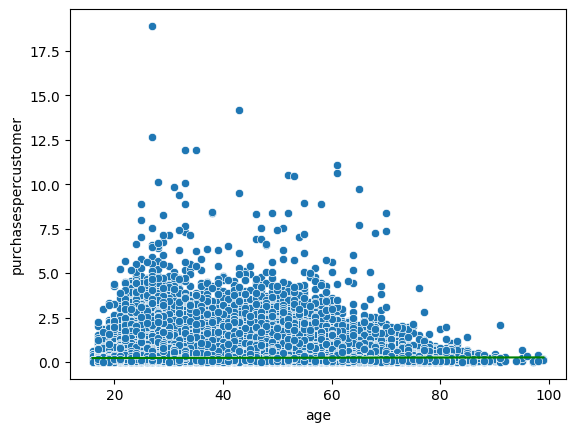

In [37]:
sns.scatterplot(data=CustomerPurchases, x='age',y='purchasespercustomer')

sns.lineplot(data=CustomerPurchases, x=CustomerPurchases['age'], y=results.fittedvalues,color='green')


#### 4.3. Goodness of Fit
#### We need to determine how accurate is the model we have just fit. To do so we compute the $R^2$

In [39]:
results.rsquared

0.00040644068311812553

In [41]:
100*results.rsquared

0.04064406831181255

#### Based on the previous result we conclude that our model is not very good as it is able to explain only 0.04% of the total variability between `age` and `purchasespercustomer`

#### We would need to incorporate additional variables into the model and probably add quadratic effects. You will learn how to do this in the coming weeks.